<IPython.core.display.Math object>

,x1,x2,x3,x4,y
0,4,1,4.5,1,1.7
1,4,1,2,1,1.6
2,4,2,2,2,0.95
3,4,2,3,3,0.94
4,4,1,3,1,1.5
5,4,1,6,1,1.3
6,4,1,1,1,1.5
7,5,2,2,2.2,0.99
8,5,2,2,2.2,1
9,1,4,1,1,1.3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

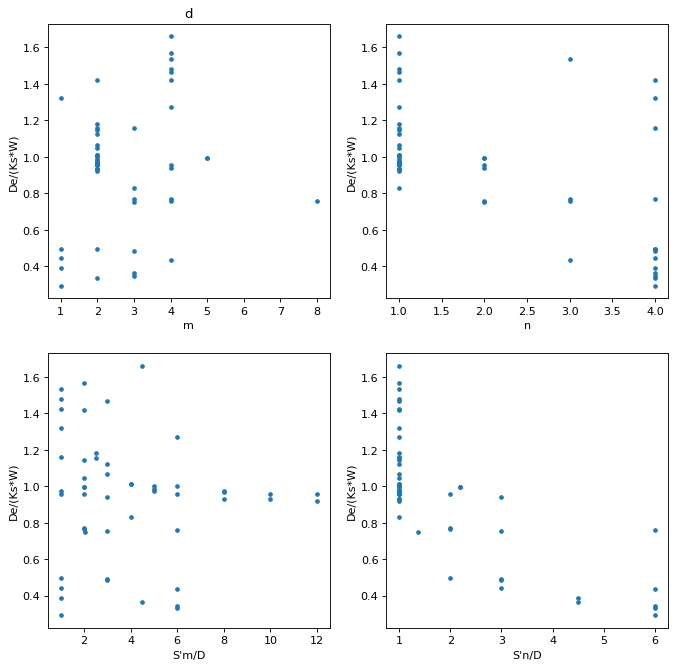

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>




test & train separation is not yet done


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,coefficient
b0,0.9
b1,0.36
b2,0.02
b3,-0.08
b4,-0.64


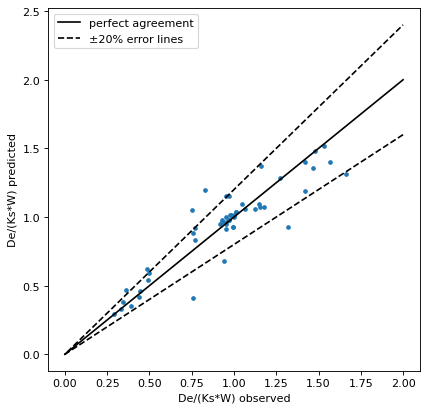

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,x1,x2,x3,x4,y,yhat1
0,4,1,4.5,1,1.7,1.3
1,4,1,2,1,1.6,1.4
2,4,2,2,2,0.95,0.91
3,4,2,3,3,0.94,0.68
4,4,1,3,1,1.5,1.4
5,4,1,6,1,1.3,1.3
6,4,1,1,1,1.5,1.5
7,5,2,2,2.2,0.99,0.93
8,5,2,2,2.2,1,0.93
9,1,4,1,1,1.3,0.93


Sheppard, D. M., and R. Renna. "Florida scour manual." (2010). 
 Arneson, L. A., Zevenbergen, L. W., Lagasse, P. F., & Clopper, P. E. (2012). Evaluating scour at bridges (No. FHWA-HIF-12-003). National Highway Institute (US).


In [280]:
%reset -f



from IPython.display import display, Math, Latex,Markdown, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from termcolor import colored


display(HTML('<h1><font color="blue">Pile Group 3 day scour data</font></h1>'))
display(HTML('<h2><font color="blue">Dataset</font></h2>'))

display(HTML('<h2><font color="blue">Published paper</font></h2>'))
paper_title='Discussion of “Estimation of Clear-Water Local Scour at Pile Groups Using Genetic \
Expression Programming and Multivariate Adaptive Regression Splines”  \
by S. M. Bateni, H. R. Vosoughifar, B. Truce, and D. S. Jeng'
paper_link="https://ascelibrary.org/doi/abs/10.1061/(ASCE)WW.1943-5460.0000565"
display(HTML('Paper describing the dataset:' + paper_title +'found in <a href='+paper_link+'>'+paper_link+'</a>'))


pd.options.display.float_format = '{:,.2g}'.format
pd.set_option('display.max_rows', 1000)




pilegroup3day=np.array(
    [[4,1,4.5,1,1.65997226313099],
    [4,1,2,1,1.56772297779335],
    [4,2,2,2,0.954930564225732],
    [4,2,3,3,0.940589072644779],
    [4,1,3,1,1.46558883505543],
    [4,1,6,1,1.27159830076937],
    [4,1,1,1,1.4781656260062],
    [5,2,2,2.2,0.993414392162051],
    [5,2,2,2.2,0.995056995914127],
    [1,4,1,1,1.32023689065985],
    [1,4,1,2,0.495647449972816],
    [1,4,1,3,0.442188528846585],
    [2,4,1,1,1.42046372906479],
    [4,3,6,6,0.435648596426296],
    [2,4,3,3,0.49198170731234],
    [4,3,1,1,1.53486087415227],
    [4,1,2,1,1.41813931645102],
    [1,4,1,6,0.292084023110536],
    [3,4,2,2,0.767005165838466],
    [2,4,6,6,0.332692837303664],
    [3,4,1,1,1.15715449389041],
    [3,4,3,3,0.484694251413122],
    [1,4,1,4.5,0.388691327703642],
    [3,4,4.5,4.5,0.363266481902613],
    [4,2,6,6,0.758110309604791],
    [4,3,2,2,0.768105550683916],
    [3,4,6,6,0.344763158968065],
    [8,3,3,3,0.7566270274948],
    [3,1,4,1,0.830024114550753],
    [3,2,2.04545454545455,1.36363636363636,0.750107322822722],
    [2,1,4,1,1.01104943961001],
    [2,1,5,1,0.973904660831297],
    [2,1,6,1,0.955027638886217],
    [2,1,8,1,0.930552616325626],
    [2,1,10,1,0.930552616325626],
    [2,1,12,1,0.919017072077287],
    [2,1,1,1,0.955243280075371],
    [2,1,2,1,1.04556047792024],
    [2,1,2.5,1,1.15609541764111],
    [2,1,3,1,1.12393661850448],
    [2,1,4,1,1.00995871898412],
    [2,1,5,1,0.98490288832092],
    [2,1,8,1,0.96804146387356],
    [2,1,10,1,0.955243280075371],
    [2,1,12,1,0.955243280075371],
    [2,1,1,1,0.971636649273113],
    [2,1,2,1,1.14529209176135],
    [2,1,2.5,1,1.17936150361196],
    [2,1,3,1,1.06502170348242],
    [2,1,5,1,1.00194447476452],
    [2,1,6,1,1.00194447476452],
    [2,1,8,1,0.971636649273113]])

x=pilegroup3day[:,0:4]
y=pilegroup3day[:,4]

x1=x[:,0]
x2=x[:,1]
x3=x[:,2]
x4=x[:,3]

N=x[0,:] #N=53
Ndim=len(x[0,:]) #Ndim=4

df_pilegroup3day=pd.DataFrame(pilegroup3day,columns=['x1','x2','x3','x4','y'])
df1=df_pilegroup3day

display(Math(r'\text{Table 1. Dimensionless data}'))

display(HTML("<div style='height: 400px; overflow: auto; width: fit-content'>"+df1.to_html()+"</div>"))

print('\n\n')
display(HTML('<h2><font color="blue">Data description</font></h2>'))

display(Math(r'\text{Pile Group local scour for tests longer than 3 days}'))
display(Math(r'K_s = \text{shape factor, =1.0 for group of cylinders, =1.1 for group of square piles} '))
display(Math(r'D_e = \text{equivalent pier width based on FDOT (Sheppard & Renna 2010)} '))
display(Math(r'W=n D = \text{projected width of pile group for aligned flow}'))
display(Math(r'S_m , S_n = \text{spacing of piles inline & perpendicular to the flow} '))
display(Math(r'm, n = \text{number of piles inline & perpendicular to the flow, respectively}'))
display(Math(r'S^\prime_n=S_n \:\: \text{if} \:\:  n>1 \text{,} \:\: S^\prime_n=D \:\: \text{if } \:\: n=1'))
display(Math(r'S^\prime_n=S_m \:\: \text{if} \:\:   m>1 \text{,} \:\: S^\prime_m=D \:\:\text{if } \:\: m=1'))
display(Math(r'x_1=m, \:\: x_2=n,\:\: x_3=\frac{S^\prime_m}{D},\:\: x_4=\frac{S^\prime_n}{D},\:\: y=\frac{D_e}{K_s W}'))
display(Math(r'N=53 \:\: \text{ = number of datapoints,} '))
display(Math(r'N_{dim}=4 \:\: \text{ = number of input variables} '))

print('\n\n')
display(HTML('<h2><font color="blue">Plots of data</font></h2>'))


fig,ax=plt.subplots(2,2,figsize=(10, 10), dpi=80)
ax[0,0].scatter(x1,y,s=10)
ax[0,0].set_xlabel('m')
ax[0,0].set_ylabel('De/(Ks*W)')
ax[0,0].set_title('a')

ax[0,1].scatter(x2,y,s=10)
ax[0,1].set_xlabel('n')
ax[0,1].set_ylabel('De/(Ks*W)')
ax[0,0].set_title('b')

ax[1,0].scatter(x3,y,s=10)
ax[1,0].set_xlabel('S\'m/D')
ax[1,0].set_ylabel('De/(Ks*W)')
ax[0,0].set_title('c')

ax[1,1].scatter(x4,y,s=10)
ax[1,1].set_xlabel('S\'n/D')
ax[1,1].set_ylabel('De/(Ks*W)')
ax[0,0].set_title('d')
plt.show()

print('\n\n')
display(HTML('<h2><font color="blue">Fitting formulas to the data</font></h2>'))

display(Math(r'\text{the following formula is fitted to the data}'))
display(Math(r'\frac{D_e}{K_s W} = 1.01 m^{0.27} n^{-0.08} \
               \left(\frac{S^\prime_m}{D}\right)^{-0.03} \
               \left(\frac{S^\prime_n}{D}\right)^{-0.57} '))

plt.show()
display(Math(r'\text{Figure. Plot of y vs x1 (a), x2 (b), x3 (c) & x4 (d)}'))
print('\n\n')

def func1(b,x):
    x1=x[:,0]
    x2=x[:,1]
    x3=x[:,2]
    x4=x[:,3]
    y=b[0]*np.power(x1,b[1])*np.power(x2,b[2])*np.power(x3,b[3])*np.power(x4,b[4])
    return y

func1a = lambda b : func1(b,x) #anonymous function for calculating yhat

def func1mse(b,y):
    yhat=func1a(b)
    return 0.5*np.mean((y-yhat)*(y-yhat))

print(colored('test & train separation is not yet done', 'red'))

display(Math(r'\text{the loss function is:}'))
display(Math(r'MSE=\frac{1}{2} \sum_{i=1}^{N_\text{train}}{\left(y_i-\hat{y}_i\right)^2}'))

display(Math(r'\text{Using Scipy optimize}'))


func1m = lambda b : func1mse(b,y) #anonymous function for calculating mse
#takes the entire y vector
#could modify it to only take the training set
#for example y_train

Nv=4+1
b=np.random.rand(Nv)



b[0]=0.9
b[1]=0.36
b[2]=0.02
b[3]=-0.08
b[4]=-0.64

b=scipy.optimize.minimize(func1m,b).x
b=np.round(b,2)



yhat1=func1(b,x)



display(Math(r'\text{Table. Values of} \: b \: \text{coefficients for } \
                \:\: y=b_0 \: x_1^{b_1} \: x_2^{b_2} \: x_3^{b_3} \: x_4^{b_4}'))
display(pd.DataFrame(b,index=['b0','b1','b2','b3','b4'],columns=['coefficient']))



print('\n\n')
display(HTML('<h2><font color="blue">Results</font></h2>'))

a=2
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(y,yhat1,s=10)
plt.plot([0,a],[0,a],'k',label='perfect agreement')
plt.plot([a,0,a],[0.8*a,0,1.2*a],'k--',label='±20% error lines')
plt.xlabel('De/(Ks*W) observed')
plt.ylabel('De/(Ks*W) predicted')
plt.legend()
plt.show()
display(Math(r'\text{Figure. Scatter plot of observations vs predictions}'))


display(Math(r'\text{Table. Entire data with predictions}'))
df1=pd.DataFrame(np.c_[x1,x2,x3,x4,y,yhat1],columns=['x1','x2','x3','x4','y','yhat1'])
display(HTML("<div style='height: 400px; overflow: auto; width: fit-content'>"+df1.to_html()+"</div>"))


display(HTML('<h2><p style="color:blue">References</p></h2>'))
ref1='Sheppard, D. M., and R. Renna. "Florida scour manual." (2010).'
ref2='Arneson, L. A., Zevenbergen, L. W., Lagasse, P. F., & Clopper, P. E. (2012). ' + \
'Evaluating scour at bridges (No. FHWA-HIF-12-003). National Highway Institute (US).'
print(ref1,'\n',ref2)
